# **Project Title: Predicting divorce**
by Kabir, Rodrigue and Sertac

**Research main objective**

This project aims to develop and validate predictive models of divorce using multidimensional determinants (demographic, socioeconomic, relational, and psychological characteristics), and to identify the key factors that most strongly contribute to marital dissolution. 

Specifically, it seeks at 

-	Training and comparing multiple supervised learning models predicting divorce
-	Identifiy the most important predictors of divorce


**Research questions**

-	Which supervised machine-learning model offers the most reliable and robust prediction of divorce?
-	Which factors contribute most to predicting divorce ?


**Methods**
-	Exploration of the dataset 
-	Preparation of the dataset
-	Training and comparison of supervised learning models
-	Identification of  the most important predictors of divorce


**Import libraries and load the dataset**

In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from xgboost import XGBClassifier, XGBRegressor
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder # <-- StandardScaler is imported here
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression # Added for Logistic Regression model
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import (
    confusion_matrix,
    ConfusionMatrixDisplay,
    classification_report,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    mean_squared_error,
    mean_absolute_error,
    r2_score
)

In [88]:
URL = 'https://github.com/Kabir26-star/CAS-ADS-Module-3/blob/main/divorce_df.csv?raw=true'
df = pd.read_csv(URL)
df

URLError: <urlopen error [Errno 12] Cannot allocate memory>

In [89]:
df_copy = df.copy()

print("Dataset copied successfully to df_copy.")
display(df_copy.head(10))

Dataset copied successfully to df_copy.


,age_at_marriage,marriage_duration_years,num_children,education_level,employment_status,combined_income,religious_compatibility,cultural_background_match,communication_score,conflict_frequency,...,mental_health_issues,infidelity_occurred,counseling_attended,social_support,shared_hobbies_count,marriage_type,pre_marital_cohabitation,domestic_violence_history,trust_score,divorced
0,30,1,1,Bachelor,Full-time,64001,Different Religion,1,5.536016,3,...,0,0,0,8.428183,5,Love,1,0,6.262411,1
1,27,2,2,Master,Full-time,86221,Same Religion,1,5.810172,3,...,0,1,0,5.297221,1,Love,1,0,6.769384,1
2,31,6,0,High School,Part-time,69441,Same Religion,0,6.088146,3,...,0,0,0,5.887066,1,Arranged,1,0,5.532866,1
3,35,3,2,Bachelor,Full-time,69513,Not Religious,1,6.212046,3,...,0,0,0,5.263555,5,Love,1,0,3.491264,0
4,26,2,2,No Formal Education,Full-time,63986,Different Religion,1,4.826262,1,...,0,0,1,5.771259,4,Love,1,0,10.000000,1
5,26,10,0,High School,Full-time,44605,Same Religion,0,6.825964,3,...,0,0,0,6.909350,3,Love,1,0,4.628149,0
6,35,10,2,High School,Full-time,73454,Different Religion,1,3.775491,1,...,0,0,0,7.351375,1,Love,1,0,5.753932,0
7,31,17,1,High School,Unemployed,59491,Not Religious,1,6.613021,4,...,0,0,0,8.709813,2,Love,0,0,7.010559,1
8,25,5,1,Bachelor,Full-time,40944,Not Religious,0,2.963345,0,...,0,0,0,8.727489,3,Arranged,1,0,2.428385,0
9,30,1,0,PhD,Full-time,46819,Same Religion,1,3.612109,1,...,1,0,0,5.939285,1,Arranged,1,0,8.750676,1


In [ ]:
# 1. Define the columns for the 'Yes'/'No' replacement
yes_no_cols = [
    "cultural_background_match",
    "mental_health_issues",
    "infidelity_occurred",
    "counseling_attended",
    "pre_marital_cohabitation"
]

# 2. Perform the '1' -> 'Yes' and '0' -> 'No' replacement
# The 'replace' method is efficient for this.
replace_map_yes_no = {1: 'Yes', 0: 'No'}
df_copy[yes_no_cols] = df_copy[yes_no_cols].replace(replace_map_yes_no)

# 3. Define the column for the 'Divorced'/'Non divorced' replacement
divorced_col = "divorced"

# 4. Perform the '1' -> 'Divorced' and '0' -> 'Non divorced' replacement
replace_map_divorced = {1: 'Divorced', 0: 'Non divorced'}
df_copy[divorced_col] = df_copy[divorced_col].replace(replace_map_divorced)

# Display the resulting DataFrame
print("Modified DataFrame:")
print(df_copy)
df_copy

Modified DataFrame:
      age_at_marriage  marriage_duration_years  num_children  \
0                  30                        1             1   
1                  27                        2             2   
2                  31                        6             0   
3                  35                        3             2   
4                  26                        2             2   
...               ...                      ...           ...   
4995               27                        1             3   
4996               31                       21             2   
4997               43                       13             2   
4998               32                        1             2   
4999               23                        8             2   

          education_level employment_status  combined_income  \
0                Bachelor         Full-time            64001   
1                  Master         Full-time            86221   
2             High 

,age_at_marriage,marriage_duration_years,num_children,education_level,employment_status,combined_income,religious_compatibility,cultural_background_match,communication_score,conflict_frequency,...,mental_health_issues,infidelity_occurred,counseling_attended,social_support,shared_hobbies_count,marriage_type,pre_marital_cohabitation,domestic_violence_history,trust_score,divorced
0,30,1,1,Bachelor,Full-time,64001,Different Religion,Yes,5.536016,3,...,No,No,No,8.428183,5,Love,Yes,0,6.262411,Divorced
1,27,2,2,Master,Full-time,86221,Same Religion,Yes,5.810172,3,...,No,Yes,No,5.297221,1,Love,Yes,0,6.769384,Divorced
2,31,6,0,High School,Part-time,69441,Same Religion,No,6.088146,3,...,No,No,No,5.887066,1,Arranged,Yes,0,5.532866,Divorced
3,35,3,2,Bachelor,Full-time,69513,Not Religious,Yes,6.212046,3,...,No,No,No,5.263555,5,Love,Yes,0,3.491264,Non divorced
4,26,2,2,No Formal Education,Full-time,63986,Different Religion,Yes,4.826262,1,...,No,No,Yes,5.771259,4,Love,Yes,0,10.000000,Divorced
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,27,1,3,Master,Full-time,67410,Same Religion,Yes,7.406795,1,...,No,No,No,4.071359,4,Arranged,Yes,0,6.333963,Non divorced
4996,31,21,2,Bachelor,Homemaker,88995,Same Religion,Yes,3.971897,2,...,No,Yes,Yes,3.064645,3,Love,Yes,0,3.279566,Non divorced
4997,43,13,2,Bachelor,Homemaker,93184,Same Religion,No,10.000000,4,...,Yes,No,No,7.728128,3,Other,No,0,4.002068,Divorced
4998,32,1,2,Master,Part-time,54132,Same Religion,Yes,3.382175,2,...,No,No,No,8.827352,3,Arranged,Yes,0,3.790967,Non divorced


**Exploration of the dataset**

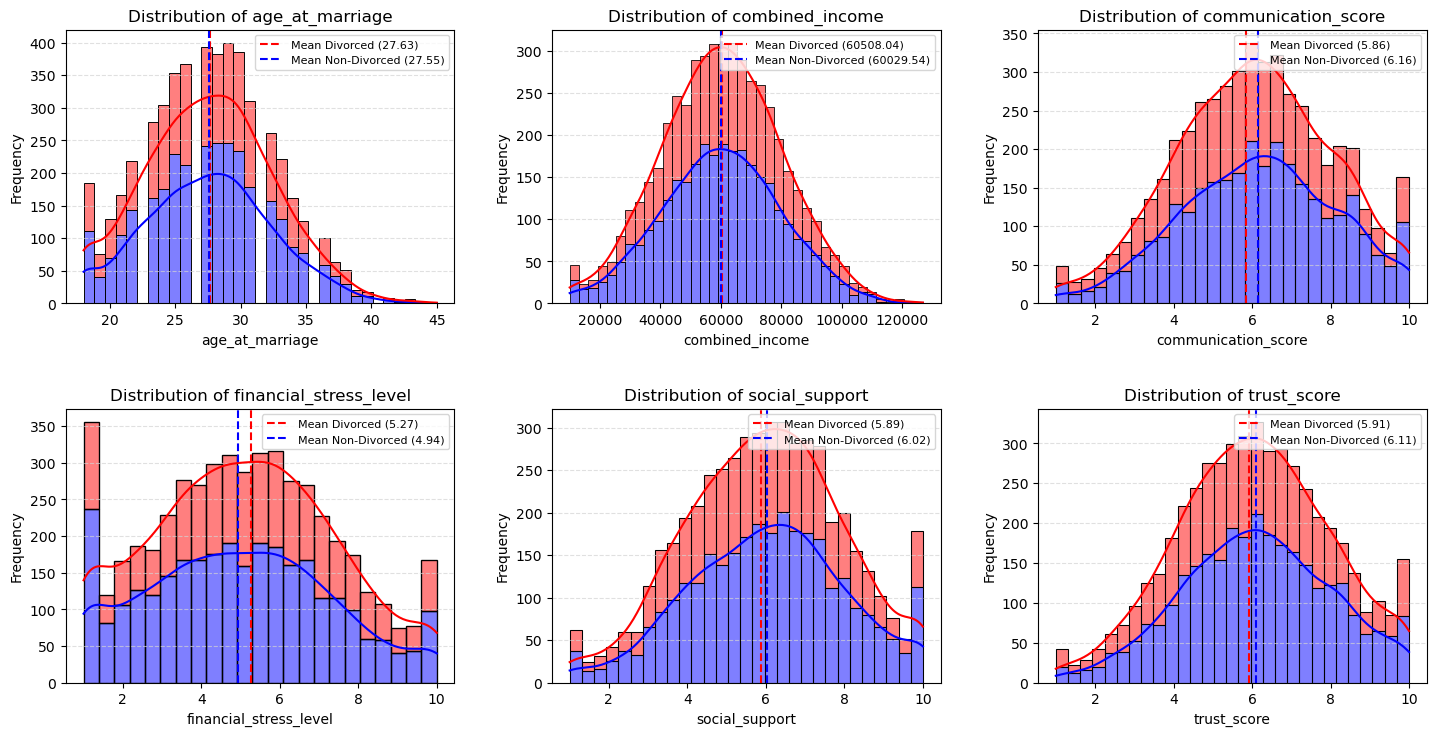

In [ ]:
# Define the specific continuous columns to visualize
plot_columns = [
    "age_at_marriage",
    "combined_income",
    "communication_score",
    "financial_stress_level",
    "social_support",
    "trust_score"
]

# Define a consistent color palette for 'divorced' status
# Red for Divorced, Blue for Non-Divorced, ensuring consistency between histogram and mean lines
divorced_palette = {
    'Divorced': 'red',
    'Non divorced': 'blue'
}

# Setup the subplot layout
n_plots = len(plot_columns)
n_cols = 3  # Displaying 3 plots per row
n_rows = (n_plots + n_cols - 1) // n_cols

# Adjust figure size for optimal viewing (5 units width per column, 4 units height per row)
plt.figure(figsize=(n_cols * 5, n_rows * 4))

# Loop through the columns and generate the plots
for i, col in enumerate(plot_columns):
    # Select the current subplot
    plt.subplot(n_rows, n_cols, i + 1)

    # Generate the histogram with hue
    sns.histplot(
        data=df_copy,
        x=col,
        hue='divorced',
        kde=True, # Add a kernel density estimate line
        multiple='stack', # Stack the bars for easier visualization
        palette=divorced_palette # Apply the consistent colors
    )
      # Calculate mean values for each group
    mean_div = df_copy[df_copy['divorced'] == "Divorced"][col].mean()
    mean_non_div = df_copy[df_copy['divorced'] == "Non divorced"][col].mean()

    # Add mean lines (matching the color palette)
    plt.axvline(mean_div, color='r', linestyle='--', linewidth=1.5, label=f'Mean Divorced ({mean_div:.2f})')
    plt.axvline(mean_non_div, color='b', linestyle='--', linewidth=1.5, label=f'Mean Non-Divorced ({mean_non_div:.2f})')
    
    # Set title, labels, and grid
    plt.title(f'Distribution of {col}', fontsize=12)
    plt.xlabel(col, fontsize=10)
    plt.ylabel('Frequency', fontsize=10)
    plt.grid(axis='y', linestyle='--', alpha=0.7, color='lightgray')

    # Add legend to show mean lines
    plt.legend(loc='upper right', fontsize=8)

# 5. Final adjustments and display
plt.tight_layout(pad=3.0) # Adjust spacing between subplots
plt.show()

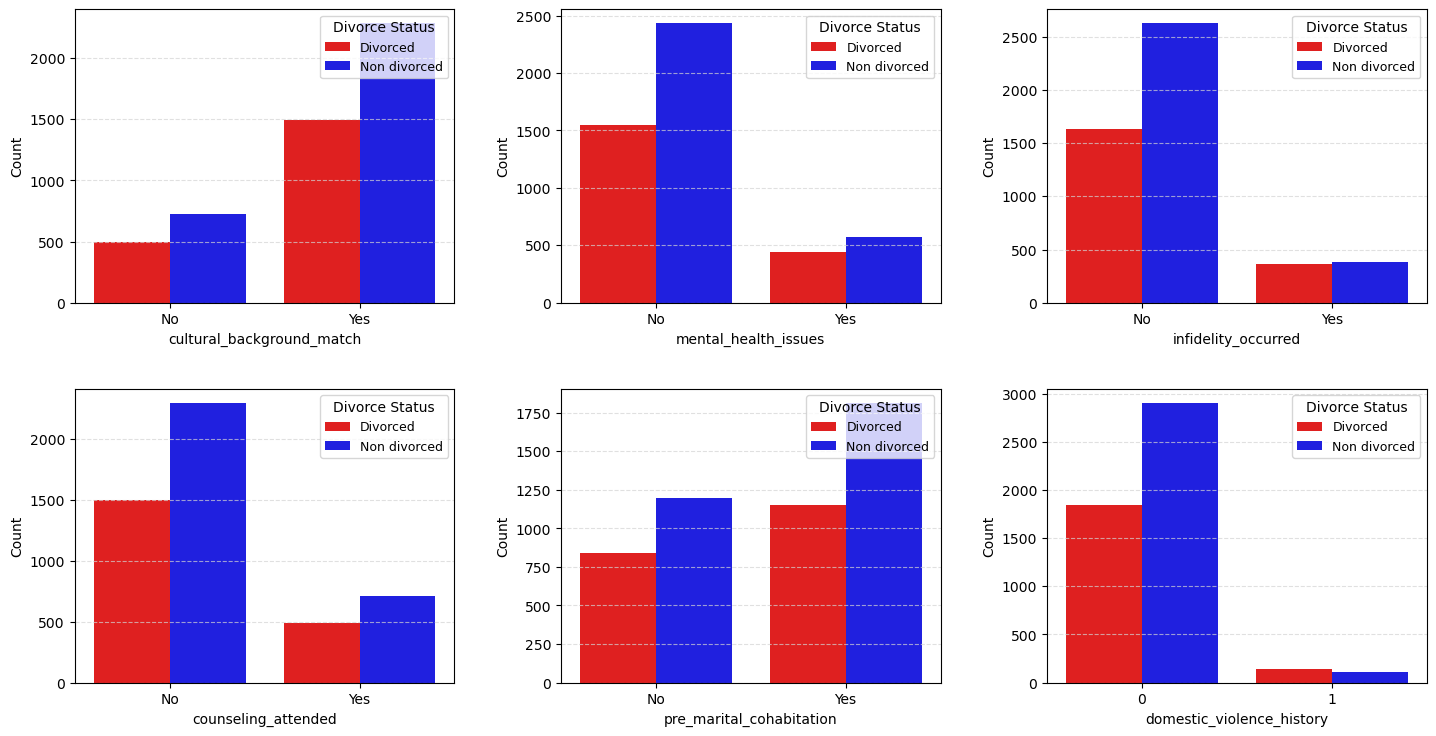

In [ ]:
# Define the specific binary columns to visualize (UPDATED LIST)
categorical_cols = [
    "cultural_background_match",
    "mental_health_issues",
    "infidelity_occurred",
    "counseling_attended",
    "pre_marital_cohabitation",
    "domestic_violence_history"
]

# Define a consistent color palette for 'divorced' status
divorced_palette = {
    'Divorced': 'red',
    'Non divorced': 'blue'
}

# Setup the subplot layout (UPDATED FOR 6 PLOTS)
n_plots = len(categorical_cols) # 6 total plots
n_cols = 3  # Displaying 3 plots per row
n_rows = (n_plots + n_cols - 1) // n_cols # Calculates 2 rows

# Adjust figure size for optimal viewing 
plt.figure(figsize=(n_cols * 5, n_rows * 4))

# Loop through the columns and generate the plots
for i, col in enumerate(categorical_cols):
    plt.subplot(n_rows, n_cols, i + 1)

    # Determine the order: For Yes/No columns, ensure consistency
    order = df_copy[col].value_counts().index
    if 'Yes' in order and 'No' in order:
        order = ['No', 'Yes'] # Prefer 'No' first for better comparison

    # Generate the count plot
    sns.countplot(
        data=df_copy,
        x=col,
        hue='divorced',
        palette=divorced_palette, # Apply the consistent colors
        order=order # Use the determined order
    )

    # Set title, labels, and grid
    plt.xlabel(col, fontsize=10)
    plt.ylabel('Count', fontsize=10)
    
    # Place legend outside or adjust location
    plt.legend(title='Divorce Status', loc='upper right', fontsize=9)
    plt.grid(axis='y', linestyle='--', alpha=0.7, color='lightgray')
    
    # Rotate x-axis labels if necessary
    plt.xticks(rotation=0)


# Final adjustments and display
plt.tight_layout(pad=3.0) # Adjust spacing between subplots
plt.show()

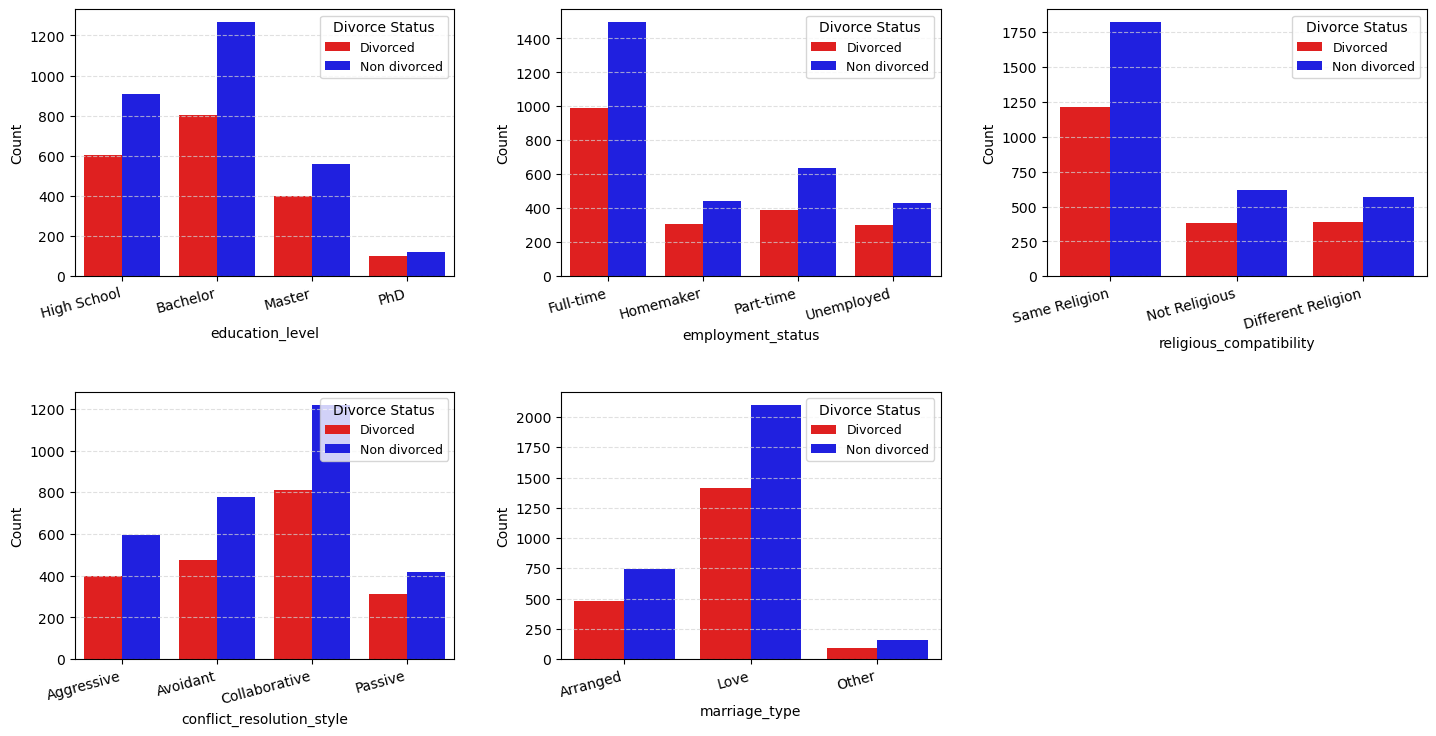

In [ ]:

# 1. Define the specific categorical columns to visualize (UPDATED LIST)
categorical_cols = [
    "education_level",
    "employment_status",
    "religious_compatibility",
    "conflict_resolution_style",
    "marriage_type"
]

# 2. Define a consistent color palette for 'divorced' status
divorced_palette = {
    'Divorced': 'red',
    'Non divorced': 'blue'
}

# 3. Setup the subplot layout (UPDATED FOR 5 PLOTS)
n_plots = len(categorical_cols) # 5 total plots
n_cols = 3  # Displaying 3 plots per row
n_rows = (n_plots + n_cols - 1) // n_cols # Calculates 2 rows

# Adjust figure size for optimal viewing 
plt.figure(figsize=(n_cols * 5, n_rows * 4))

# 4. Loop through the columns and generate the plots
for i, col in enumerate(categorical_cols):
    plt.subplot(n_rows, n_cols, i + 1)

    # Determine the order: 
    order = None
    if col == 'education_level':
        order = ['High School', 'Bachelor', 'Master', 'PhD']
    # UPDATED: Ordering logic for the new religious compatibility modalities
    elif col == 'religious_compatibility':
        order = ['Same Religion', 'Not Religious', 'Different Religion']
    else:
        # Default to sorting unique values, useful for numerical categories like counts
        if df_copy[col].dtype.name in ['int64', 'category', 'object']:
            try:
                # Try to sort numerically if possible
                order = sorted(df_copy[col].unique())
            except TypeError:
                # Fallback to sorting alphabetically/by frequency for complex objects
                order = df_copy[col].value_counts().index


    # Generate the count plot
    sns.countplot(
        data=df_copy,
        x=col,
        hue='divorced',
        palette=divorced_palette, # Apply the consistent colors
        order=order # Use the determined order
    )

    # Set title, labels, and grid
    plt.xlabel(col, fontsize=10)
    plt.ylabel('Count', fontsize=10)

    # Place legend outside or adjust location
    plt.legend(title='Divorce Status', loc='upper right', fontsize=9)
    plt.grid(axis='y', linestyle='--', alpha=0.7, color='lightgray')
    
    # Rotate x-axis labels for long category names
    plt.xticks(rotation=15, ha='right')


# 5. Final adjustments and display
plt.tight_layout(pad=3.0) # Adjust spacing between subplots
plt.show()

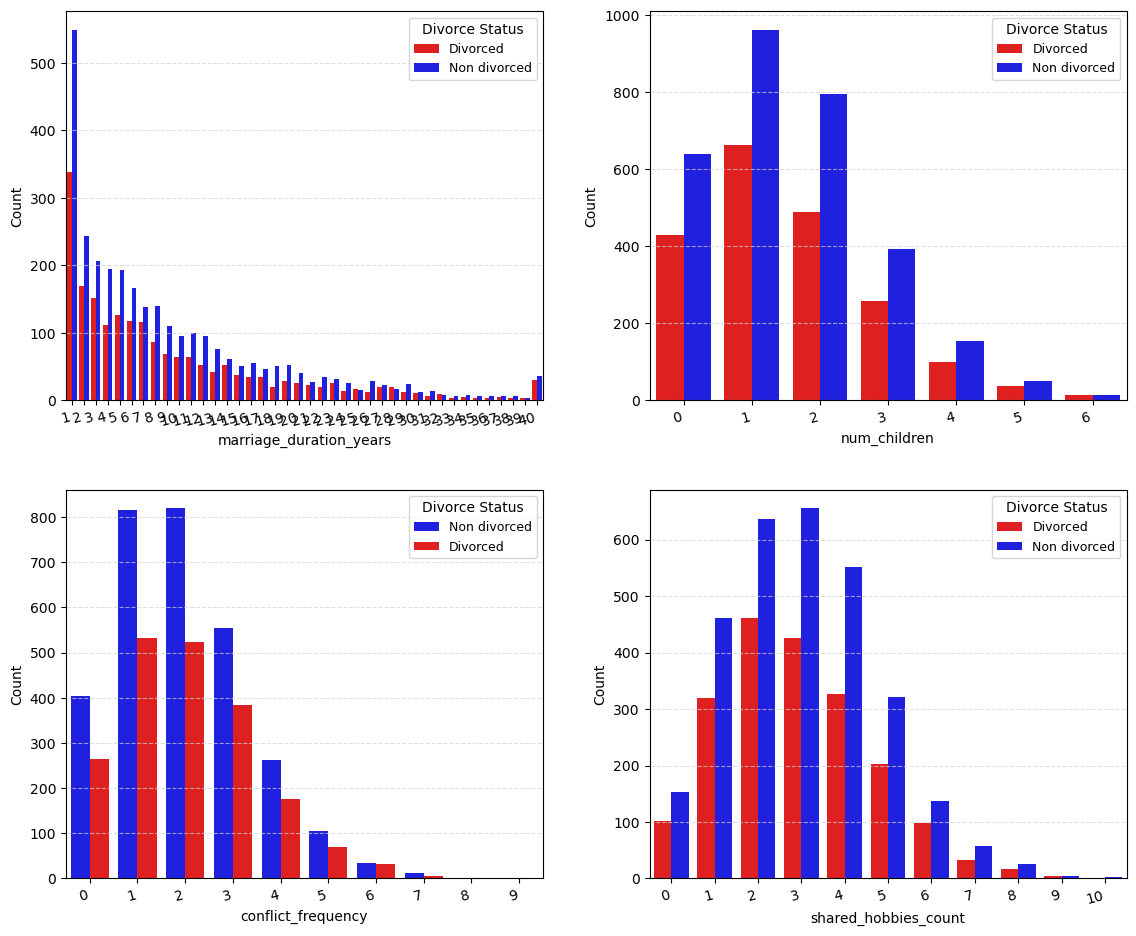

In [ ]:
# 1. Define the specific categorical columns to visualize (UPDATED LIST)
categorical_cols = [
    "marriage_duration_years",
    "num_children",
    "conflict_frequency",
    "shared_hobbies_count"
]

# 2. Define a consistent color palette for 'divorced' status
divorced_palette = {
    'Divorced': 'red',
    'Non divorced': 'blue'
}

# 3. Setup the subplot layout (UPDATED FOR 4 PLOTS)
n_plots = len(categorical_cols) # 4 total plots
n_cols = 2  # Displaying 2 plots per row
n_rows = (n_plots + n_cols - 1) // n_cols # Calculates 2 rows

# Adjust figure size for optimal viewing 
plt.figure(figsize=(n_cols * 6, n_rows * 5))

# 4. Loop through the columns and generate the plots
for i, col in enumerate(categorical_cols):
    plt.subplot(n_rows, n_cols, i + 1)

   


    # Generate the count plot
    sns.countplot(
        data=df_copy,
        x=col,
        hue='divorced',
        palette=divorced_palette, # Apply the consistent colors
        order=order # Use the determined order
    )

    # Set title, labels, and grid
    plt.xlabel(col, fontsize=10)
    plt.ylabel('Count', fontsize=10)
    

    # Place legend outside or adjust location
    plt.legend(title='Divorce Status', loc='upper right', fontsize=9)
    plt.grid(axis='y', linestyle='--', alpha=0.7, color='lightgray')
    
    # Rotate x-axis labels for readability
    plt.xticks(rotation=15, ha='right')


# 5. Final adjustments and display
plt.tight_layout(pad=3.0) # Adjust spacing between subplots
plt.show()

**Pre-processing and preparation of the dataset for machine learning**

In [90]:
# Make train-test split
# Define feature matrix X and target vector y
X = df_copy.drop('divorced', axis=1)
Y = df_copy['divorced']

# 2. Perform 80/20 train-test split with stratification
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2, random_state=42,stratify=Y)  # Essential for classification to maintain class balance)

print(f"--- Dataset Split Results ---")
print(f"Total samples: {len(df_copy)}")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train distribution:\n{Y_train.value_counts(normalize=True)}")
print(f"y_test distribution:\n{Y_test.value_counts(normalize=True)}")
print(f"-----------------------------")

--- Dataset Split Results ---
Total samples: 5000
X_train shape: (4000, 21)
X_test shape: (1000, 21)
y_train distribution:
divorced
0    0.60175
1    0.39825
Name: proportion, dtype: float64
y_test distribution:
divorced
0    0.602
1    0.398
Name: proportion, dtype: float64
-----------------------------


In [91]:
# 1. Identify feature types (BASED ON USER SPECIFICATION)
numerical_features = [
    "age_at_marriage", 
    "combined_income", 
    "communication_score", 
    "financial_stress_level", 
    "social_support", 
    "trust_score"
]
categorical_features = [
    "cultural_background_match",
    "mental_health_issues", 
    "infidelity_occurred", 
    "counseling_attended", 
    "pre_marital_cohabitation", 
    "domestic_violence_history",
    "education_level", 
    "employment_status", 
    "religious_compatibility", 
    "conflict_resolution_style", 
    "marriage_type", 
    "marriage_duration_years", 
    "num_children", 
    "conflict_frequency", 
    "shared_hobbies_count"
]

In [92]:
# 2. Create preprocessing pipelines for numerical and categorical features
numerical_transformer = StandardScaler() # Scale continuous features
categorical_transformer = OneHotEncoder(handle_unknown='ignore', sparse_output=False) # Convert categorical features to numerical

# 3. Combine transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='passthrough'
)



**Training and comparison of supervised models**

In [ ]:
# Using Logistic Regression
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=42, solver='liblinear')) # Changement vers LogisticRegression
])

# Train the model
print("\n--- Training Model (Logistic Regression Classifier) ---") # Mise à jour de l'affichage
model.fit(X_train, y_train) # Le pipeline gère le prétraitement ici
print("Model training complete.")

# Evaluate the model
y_pred = model.predict(X_test) 

# --- Métriques de Classification (Standard pour cette tâche) ---
accuracy = accuracy_score(y_test, y_pred)
print("\n--- Model Evaluation Results ---")
print(f"Accuracy on Test Set: {accuracy:.4f}")

# Calcul et affichage de la matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)
print("\n--- Matrice de Confusion ---")
print("    Predicted 0 | Predicted 1")
print(f"Actual 0: {conf_matrix[0][0]:>10} | {conf_matrix[0][1]:>10}")
print(f"Actual 1: {conf_matrix[1][0]:>10} | {conf_matrix[1][1]:>10}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


--- Training Model (Logistic Regression Classifier) ---
Model training complete.

--- Model Evaluation Results ---
Accuracy on Test Set: 0.6333

--- Matrice de Confusion ---
    Predicted 0 | Predicted 1
Actual 0:          8 |         15
Actual 1:          7 |         30

Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.35      0.42        23
           1       0.67      0.81      0.73        37

    accuracy                           0.63        60
   macro avg       0.60      0.58      0.58        60
weighted avg       0.62      0.63      0.61        60



In [120]:
# Using a RandomForestClassifier as a robust example model for classification
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

# Train the model
print("\n--- Training Model (Random Forest Classifier) ---")
model.fit(X_train, y_train)
print("Model training complete.")

# Evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("\n--- Model Evaluation Results ---")
print(f"Accuracy on Test Set: {accuracy:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))
# -----------------------------------------------------


--- Training Model (Random Forest Classifier) ---
Model training complete.

--- Model Evaluation Results ---
Accuracy on Test Set: 0.6167
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.17      0.26        23
           1       0.63      0.89      0.74        37

    accuracy                           0.62        60
   macro avg       0.57      0.53      0.50        60
weighted avg       0.58      0.62      0.56        60



In [123]:
# Using a XGBoost
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

print("\n--- Training Model (XGBoost Classifier) ---")
model.fit(X_train_processed, y_train) 
print("Model training complete.")

# Train the model
y_pred = model.predict(X_test_processed) 

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("\n--- Model Evaluation Results (XGBoost) ---")
print(f"Accuracy on Test Set: {accuracy:.4f}")

# Calcul et affichage de la matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)
print("\n--- Matrice de Confusion ---")
print("    Predicted 0 | Predicted 1")
print(f"Actual 0: {conf_matrix[0][0]:>10} | {conf_matrix[0][1]:>10}")
print(f"Actual 1: {conf_matrix[1][0]:>10} | {conf_matrix[1][1]:>10}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


--- Training Model (XGBoost Classifier) ---
Model training complete.

--- Model Evaluation Results (XGBoost) ---
Accuracy on Test Set: 0.6000

--- Matrice de Confusion ---
    Predicted 0 | Predicted 1
Actual 0:          8 |         15
Actual 1:          9 |         28

Classification Report:
              precision    recall  f1-score   support

           0       0.47      0.35      0.40        23
           1       0.65      0.76      0.70        37

    accuracy                           0.60        60
   macro avg       0.56      0.55      0.55        60
weighted avg       0.58      0.60      0.59        60



/opt/anaconda3/lib/python3.13/site-packages/xgboost/core.py:158: UserWarning: [19:30:57] WARNING: /var/folders/c_/qfmhj66j0tn016nkx_th4hxm0000gp/T/abs_b6qk1lz_ug/croot/xgboost-split_1724073748391/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


**The most important predictors of divorce**


--- Top 10 Feature Importances (XGBoost) ---
                                   Feature  Importance
     religious_compatibility_Not Religious    0.138136
                    shared_hobbies_count_1    0.052433
            marriage_duration_years_5 - 10    0.037144
                  shared_hobbies_count_3-5    0.035864
                       education_level_PhD    0.032277
religious_compatibility_Different Religion    0.031518
                      marriage_type_Modern    0.031232
                    education_level_Master    0.029628
              cultural_background_match_No    0.027261
                    shared_hobbies_count_0    0.026083


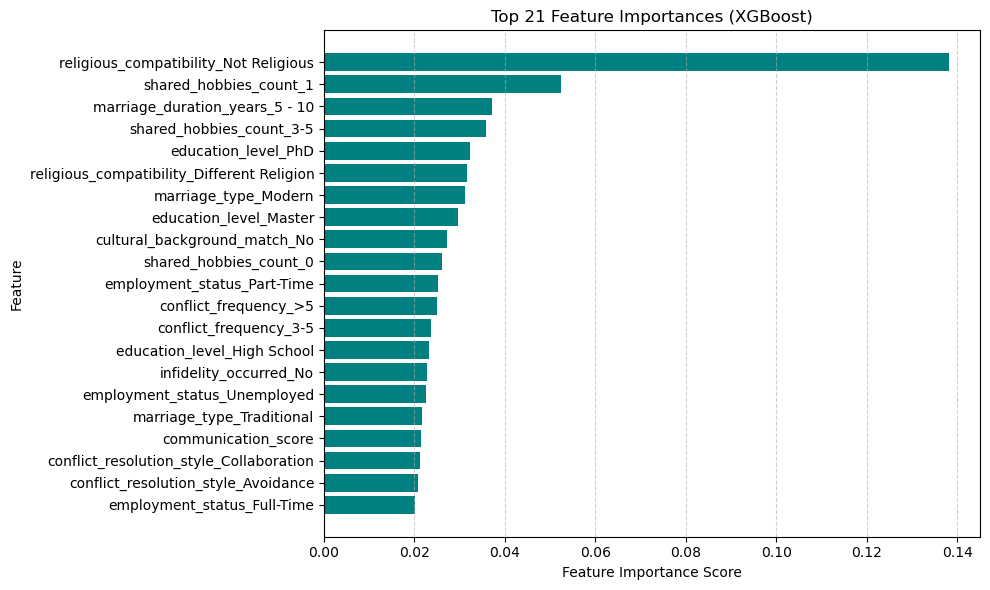

In [130]:
# 7. Extraire les noms de toutes les caractéristiques après prétraitement
# Noms des caractéristiques numériques
feature_names_num = numerical_features
# Noms des caractéristiques catégorielles après One-Hot Encoding
# Utilise get_feature_names_out pour récupérer les noms des colonnes encodées
feature_names_cat = list(preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features))
# Combiner tous les noms
all_feature_names = feature_names_num + feature_names_cat

# 8. Extraire l'importance des caractéristiques du modèle XGBoost
feature_importances = model.feature_importances_

# 9. Créer un DataFrame pour visualiser et trier
importance_df = pd.DataFrame({
    'Feature': all_feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print("\n--- Top 10 Feature Importances (XGBoost) ---")
print(importance_df.head(10).to_string(index=False))

# 11. Visualiser l'importance des caractéristiques 
plt.figure(figsize=(10, 6))
plt.title(f'Top {top_n} Feature Importances (XGBoost)')
# Utilisation de [::-1] pour que la barre la plus importante soit en haut
plt.barh(importance_df['Feature'].head(top_n).values[::-1], 
         importance_df['Importance'].head(top_n).values[::-1], 
         color='teal')
plt.xlabel('Feature Importance Score')
plt.ylabel('Feature')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()
# ---------------------------------------------------

**Social Support**

In [ ]:
X = df.drop(['num_children', 'education_level',      'employment_status',    'combined_income',      'religious_compatibility',      'cultural_background_match',    'communication_score',  'conflict_frequency',    'mental_health_issues', 'infidelity_occurred',  'counseling_attended', 'shared_hobbies_count', 'marriage_type',        'pre_marital_cohabitation',     'domestic_violence_history',    'trust_score'], axis=1)
Y = df['social_support']

In [ ]:
X_train, x_test, Y_train, y_test = train_test_split(X,Y,test_size=0.2, random_state = 42)

In [ ]:
# One-hot encode the 'conflict_resolution_style' column
X_train_encoded = pd.get_dummies(X_train, columns=['conflict_resolution_style'], drop_first=True)
x_test_encoded = pd.get_dummies(x_test, columns=['conflict_resolution_style'], drop_first=True)



In [ ]:
xgb = XGBRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
)

# Fit on encoded numeric features (avoids object dtype errors)
xgb.fit(X_train_encoded, Y_train)


,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.8
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [ ]:
# Make predictions
y_pred = xgb.predict(x_test_encoded)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\n=== Evaluation ===")
print(f"Mean Squared Error: {mse:.4f}")
print(f"R-squared: {r2:.4f}")


=== Evaluation ===
Mean Squared Error: 0.0020
R-squared: 0.9995


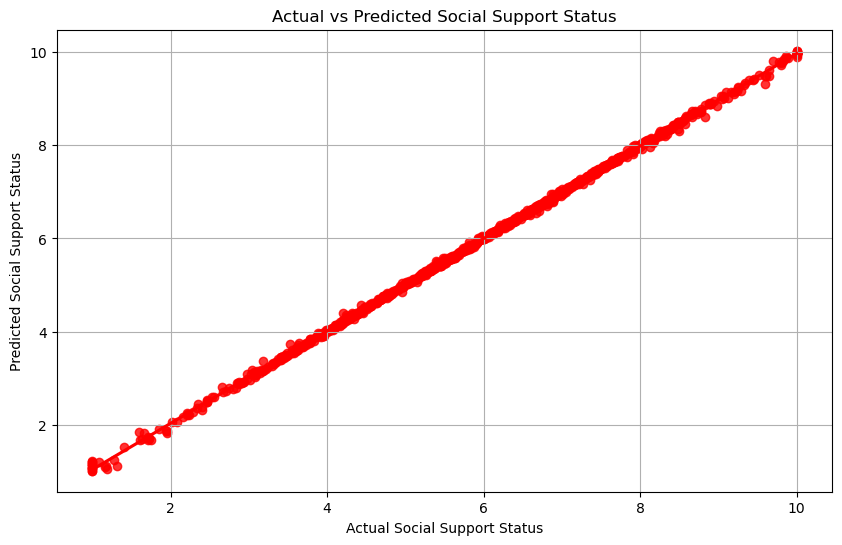

In [ ]:
plt.figure(figsize = (10,6))
sns.regplot(x=y_test, y=y_pred, color = 'red')
plt.xlabel("Actual Social Support Status")
plt.ylabel("Predicted Social Support Status")
plt.title("Actual vs Predicted Social Support Status")
plt.grid(True)
plt.show()

**Trust Score**


In [ ]:
X = df.drop(['num_children', 'education_level',      'employment_status',    'combined_income',      'religious_compatibility',      'cultural_background_match',    'communication_score',  'conflict_frequency',    'mental_health_issues', 'infidelity_occurred',  'counseling_attended', 'shared_hobbies_count', 'marriage_type',        'pre_marital_cohabitation',     'domestic_violence_history'], axis=1)
Y = df['trust_score']

In [ ]:
X_train, x_test, Y_train, y_test = train_test_split(X,Y,test_size=0.2, random_state = 42)

In [ ]:
# One-hot encode the 'conflict_resolution_style' column
X_train_encoded = pd.get_dummies(X_train, columns=['conflict_resolution_style'], drop_first=True)
x_test_encoded = pd.get_dummies(x_test, columns=['conflict_resolution_style'], drop_first=True)



In [ ]:
xgb = XGBRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
)

# Fit on encoded numeric features (avoids object dtype errors)
xgb.fit(X_train_encoded, Y_train)


,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.8
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [ ]:
# Predict on encoded test set
y_pred = xgb.predict(x_test_encoded)



In [ ]:
# Evaluate regression performance for Trust Score
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Regression metrics for Trust Score (XGBoost):")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"R^2: {r2:.4f}")


Regression metrics for Trust Score (XGBoost):
MSE: 0.0025
RMSE: 0.0503
MAE: 0.0326
R^2: 0.9994


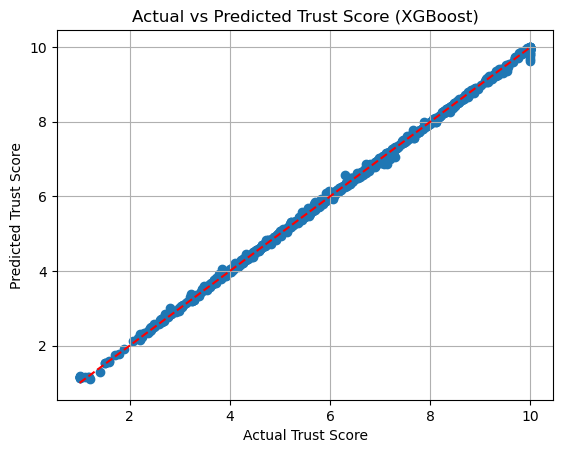

In [ ]:
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Trust Score")
plt.ylabel("Predicted Trust Score")
plt.title("Actual vs Predicted Trust Score (XGBoost)")
plt.grid(True)
plt.show()


**Communication Score**

In [ ]:
X = df.drop(['num_children', 'education_level',      'employment_status',    'combined_income',      'religious_compatibility',      'cultural_background_match',   'conflict_frequency',    'mental_health_issues', 'infidelity_occurred',  'counseling_attended', 'shared_hobbies_count', 'marriage_type',        'pre_marital_cohabitation',     'domestic_violence_history'], axis=1)
Y = df['communication_score']

In [ ]:
X_train, x_test, Y_train, y_test = train_test_split(X,Y,test_size=0.2, random_state = 42)

In [ ]:
# One-hot encode the 'conflict_resolution_style' column
X_train_encoded = pd.get_dummies(X_train, columns=['conflict_resolution_style'], drop_first=True)
x_test_encoded = pd.get_dummies(x_test, columns=['conflict_resolution_style'], drop_first=True)



In [ ]:
xgb = XGBRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
)

# Fit on encoded numeric features (avoids object dtype errors)
xgb.fit(X_train_encoded, Y_train)


,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.8
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [ ]:
y_pred = xgb.predict(x_test_encoded)

In [ ]:
# Evaluate regression performance for Trust Score
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Regression metrics for Communication Score (XGBoost):")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"R^2: {r2:.4f}")

Regression metrics for Communication Score (XGBoost):
MSE: 0.0022
RMSE: 0.0472
MAE: 0.0317
R^2: 0.9994


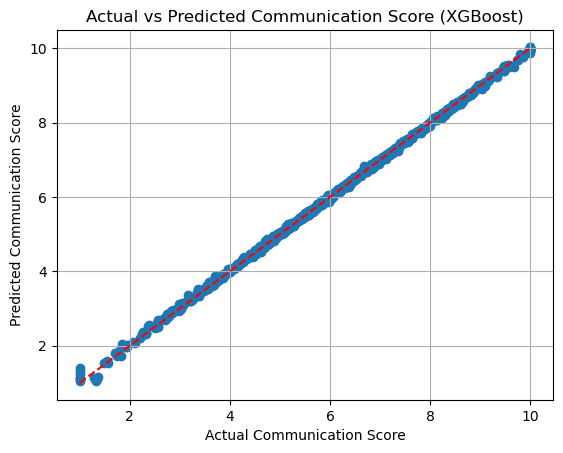

In [ ]:
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Communication Score")
plt.ylabel("Predicted Communication Score")
plt.title("Actual vs Predicted Communication Score (XGBoost)")
plt.grid(True)
plt.show()


**Financial Stress Level**

In [ ]:
X = df.drop(['marriage_duration_years',  'num_children', 'education_level',      'employment_status',    'combined_income',      'religious_compatibility',      'cultural_background_match',    'communication_score',  'conflict_frequency',    'mental_health_issues', 'infidelity_occurred',  'counseling_attended',  'social_support',       'shared_hobbies_count', 'marriage_type',        'pre_marital_cohabitation',     'domestic_violence_history'], axis=1)
Y = df['financial_stress_level']

In [ ]:
X_train, x_test, Y_train, y_test = train_test_split(X,Y,test_size=0.2, random_state = 42)

In [ ]:
# One-hot encode the 'conflict_resolution_style' column
X_train_encoded = pd.get_dummies(X_train, columns=['conflict_resolution_style'], drop_first=True)
x_test_encoded = pd.get_dummies(x_test, columns=['conflict_resolution_style'], drop_first=True)


In [ ]:
xgb = XGBRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
)

# Fit on encoded numeric features (avoids object dtype errors)
xgb.fit(X_train_encoded, Y_train)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.8
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [ ]:
y_pred = xgb.predict(x_test_encoded)

In [ ]:
# Evaluate regression performance for Stress Level
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Regression metrics for Stress level (XGBoost):")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"R^2: {r2:.4f}")

Regression metrics for Stress level (XGBoost):
MSE: 0.0070
RMSE: 0.0834
MAE: 0.0531
R^2: 0.9988


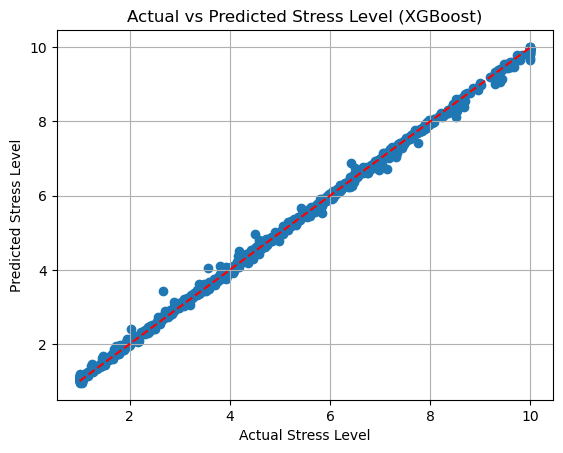

In [ ]:
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Stress Level")
plt.ylabel("Predicted Stress Level")
plt.title("Actual vs Predicted Stress Level (XGBoost)")
plt.grid(True)
plt.show()


**Machine Learning using XGB Boost**

In [ ]:
X = df.drop(['marriage_duration_years',  'num_children', 'education_level',      'employment_status',    'combined_income',      'religious_compatibility',      'cultural_background_match',    'communication_score',  'conflict_frequency',    'mental_health_issues', 'infidelity_occurred',  'counseling_attended',  'social_support',       'shared_hobbies_count', 'marriage_type',        'pre_marital_cohabitation',     'domestic_violence_history'], axis=1)
Y = df['divorced']

In [ ]:
X_train, x_test, Y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=42)

In [ ]:
# Encode categorical columns (if any) before scaling
categorical_cols = X_train.select_dtypes(include=['object','category']).columns.tolist()
if categorical_cols:
    X_train = pd.get_dummies(X_train, columns=categorical_cols, drop_first=True)
    x_test = pd.get_dummies(x_test, columns=categorical_cols, drop_first=True)
    # Align columns so train/test have same features (missing columns in test filled with 0)
    X_train, x_test = X_train.align(x_test, join='left', axis=1, fill_value=0)



In [ ]:
xgb = XGBClassifier(
    n_estimators = 100, 
    random_state = 42,
    learning_rate = 0.1,
    max_depth = 5,
    subsample = 0.8,
    colsample_bytree = 0.8,

    

)
xgb.fit(X_train, Y_train)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.8
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [ ]:
y_pred = xgb.predict(x_test)

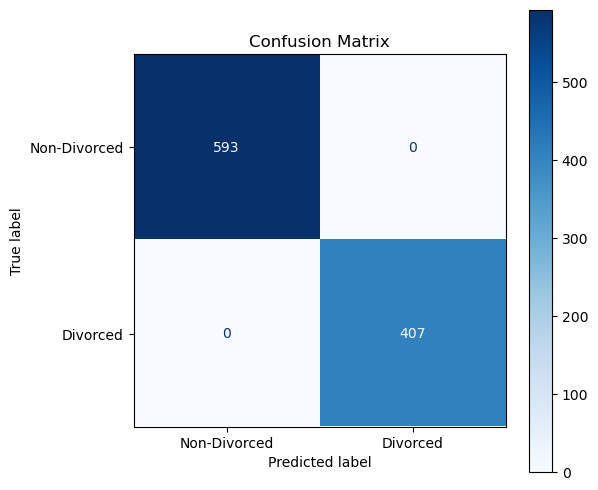

Accuracy: 1.0

Classification Report:

              precision    recall  f1-score   support

Non-Divorced       1.00      1.00      1.00       593
    Divorced       1.00      1.00      1.00       407

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



In [ ]:
# Ensure the necessary variables exist (run the Logistic Regression training & prediction cells first)
try:
    y_true = y_test
    y_pred_lr = y_pred
except NameError as e:
    raise NameError("y_test or y_pred not found. Please (re)run the Logistic Regression cells before this cell.")

# If model supports predict_proba, you may optionally threshold probabilities instead of using y_pred
if hasattr(y_pred, 'predict_proba'):
    y_prob = y_pred.predict_proba(x_test)[:, 1]
    # Uncomment next line to use a 0.5 threshold from probabilities instead of existing y_pred:
    # y_pred_lr = (y_prob >= 0.5).astype(int)

# Build labels from present classes to avoid label mismatch
labels = np.unique(np.concatenate([np.asarray(y_true), np.asarray(y_pred_lr)]))

# Create human-friendly display labels for the mental_health_issues target
# If labels are binary (0/1) map to meaningful strings, otherwise use stringified labels
try:
    numeric_labels = set(int(l) for l in labels)
except Exception:
    numeric_labels = None

if numeric_labels is not None and numeric_labels.issubset({0, 1}):
    display_map = {0: 'Non-Divorced', 1: 'Divorced'}
    display_labels = [display_map.get(int(l), str(l)) for l in labels]
else:
    display_labels = [str(l) for l in labels]

# Confusion matrix and display
cm = confusion_matrix(y_true, y_pred_lr, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=display_labels)
fig, ax = plt.subplots(figsize=(6,6))
disp.plot(ax=ax, cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.show()

# Print classification metrics
print('Accuracy:', accuracy_score(y_true, y_pred_lr))
print('\nClassification Report:\n')
print(classification_report(y_true, y_pred_lr, labels=labels, target_names=display_labels))


**Machine Learning Algorithm using Random Forest**

In [ ]:
X = df.drop(['education_level'], axis=1)
y = df['education_level']

In [ ]:
# Encode target labels if categorical
le = LabelEncoder()
y = le.fit_transform(y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
categorical_cols = X_train.select_dtypes(include=['object','category']).columns.tolist()

if categorical_cols:
    X_train = pd.get_dummies(X_train, columns=categorical_cols, drop_first=True)
    X_test = pd.get_dummies(X_test, columns=categorical_cols, drop_first=True)

    # Align train/test columns
    X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)


In [ ]:
rf = RandomForestClassifier(
    n_estimators=300,
    class_weight="balanced",
    random_state=42
)
rf.fit(X_test, y_test)

,n_estimators,300
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [ ]:
y_pred = rf.predict(X_test)

Accuracy: 1.0

Classification Report:
                      precision    recall  f1-score   support

           Bachelor       1.00      1.00      1.00       414
        High School       1.00      1.00      1.00       301
             Master       1.00      1.00      1.00       194
No Formal Education       1.00      1.00      1.00        46
                PhD       1.00      1.00      1.00        45

           accuracy                           1.00      1000
          macro avg       1.00      1.00      1.00      1000
       weighted avg       1.00      1.00      1.00      1000



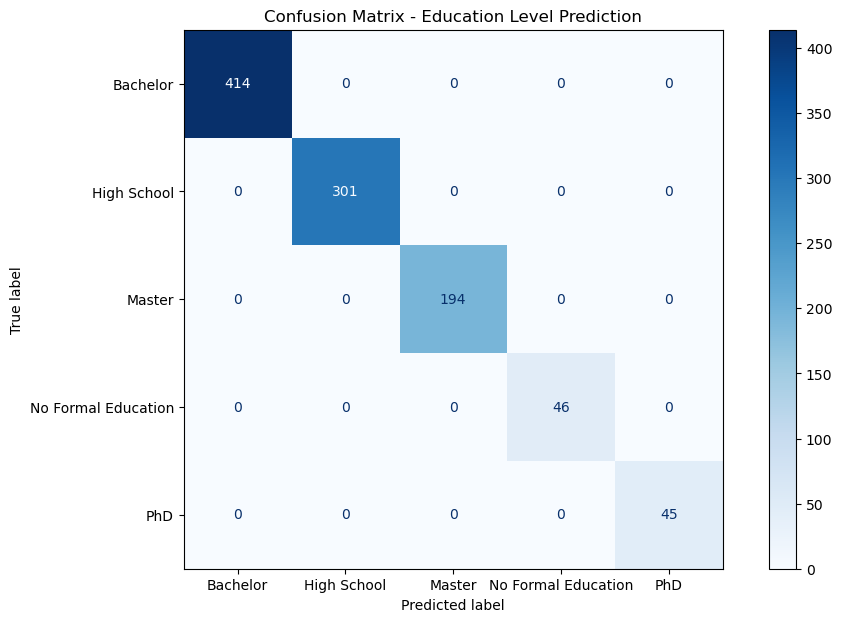

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)

fig, ax = plt.subplots(figsize=(12, 7))
disp.plot(ax=ax, cmap='Blues')
plt.title("Confusion Matrix - Education Level Prediction")
plt.show()

**Employment Status**

In [ ]:
X = df.drop(['employment_status'], axis=1)
y = df['employment_status']

In [ ]:
# Encode target labels if categorical
le = LabelEncoder()
y = le.fit_transform(y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
categorical_cols = X_train.select_dtypes(include=['object','category']).columns.tolist()

if categorical_cols:
    X_train = pd.get_dummies(X_train, columns=categorical_cols, drop_first=True)
    X_test = pd.get_dummies(X_test, columns=categorical_cols, drop_first=True)

    # Align train/test columns
    X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

In [ ]:
rf = RandomForestClassifier(
    n_estimators=300,
    class_weight="balanced",
    random_state=42
)
rf.fit(X_test, y_test)

,n_estimators,300
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [ ]:
prediction = rf.predict(X_test)

Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

   Full-time       1.00      1.00      1.00       501
   Homemaker       1.00      1.00      1.00       155
   Part-time       1.00      1.00      1.00       200
  Unemployed       1.00      1.00      1.00       144

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



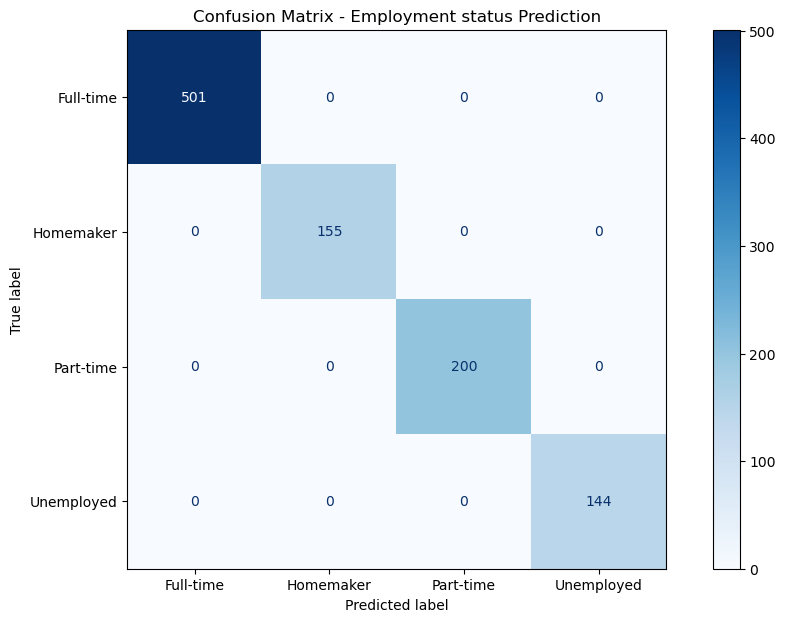

In [ ]:
print("Accuracy:", accuracy_score(y_test, prediction))
print("\nClassification Report:\n", classification_report(y_test, prediction, target_names=le.classes_))

# Confusion matrix
cm = confusion_matrix(y_test, prediction)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)

fig, ax = plt.subplots(figsize=(12, 7))
disp.plot(ax=ax, cmap='Blues')
plt.title("Confusion Matrix - Employment status Prediction")
plt.show()

**Religious compatibility**

In [ ]:
target = "religious_compatibility"

X = df.drop(columns=[target])
y = df[target]

In [ ]:
le = LabelEncoder()
y_encoded = le.fit_transform(y)

print("Encoder classes:", le.classes_)

Encoder classes: ['Different Religion' 'Not Religious' 'Same Religion']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

In [ ]:
X_train = pd.get_dummies(X_train, drop_first=True)
X_test  = pd.get_dummies(X_test, drop_first=True)

# Align feature columns
X_train, X_test = X_train.align(X_test, join="left", axis=1, fill_value=0)

In [ ]:
model = RandomForestClassifier(
    n_estimators=300,
    class_weight="balanced",
    random_state=42
)
model.fit(X_test, y_test)

,n_estimators,300
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [ ]:
y_pred = model.predict(X_test)

In [ ]:
y_test_str = le.inverse_transform(y_test)
y_pred_str = le.inverse_transform(y_pred)

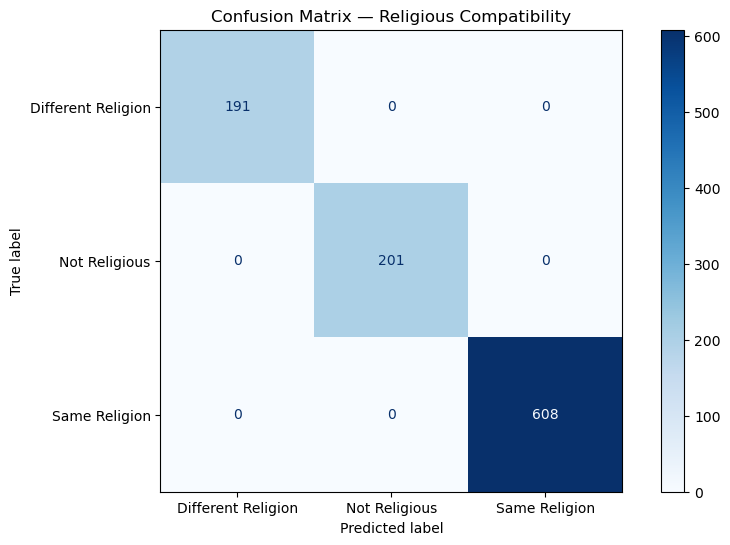

Accuracy: 1.0

Classification Report:
                     precision    recall  f1-score   support

Different Religion       1.00      1.00      1.00       191
     Not Religious       1.00      1.00      1.00       201
     Same Religion       1.00      1.00      1.00       608

          accuracy                           1.00      1000
         macro avg       1.00      1.00      1.00      1000
      weighted avg       1.00      1.00      1.00      1000



In [ ]:
labels = le.classes_

cm = confusion_matrix(y_test_str, y_pred_str, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

fig, ax = plt.subplots(figsize=(10, 6))
disp.plot(ax=ax, cmap="Blues")
plt.title("Confusion Matrix — Religious Compatibility")
plt.show()

# 11. Classification report
print("Accuracy:", accuracy_score(y_test_str, y_pred_str))

print("\nClassification Report:\n",
      classification_report(y_test_str, y_pred_str, target_names=labels))

**Conflict Resolution Style**

In [ ]:
target = 'conflict_resolution_style'
X = df.drop(columns=[target])
y = df[target]

In [ ]:
le = LabelEncoder()
y_encoded = le.fit_transform(y)

print("Encoder classes:", le.classes_)

Encoder classes: ['Aggressive' 'Avoidant' 'Collaborative' 'Passive']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

In [ ]:
X_train = pd.get_dummies(X_train, drop_first=True)
X_test  = pd.get_dummies(X_test, drop_first=True)

# Align feature columns
X_train, X_test = X_train.align(X_test, join="left", axis=1, fill_value=0)

In [ ]:
rf = RandomForestClassifier(
    n_estimators=300,
    class_weight="balanced",
    random_state=42
)
rf.fit(X_test, y_test)

,n_estimators,300
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [ ]:
pred = rf.predict(X_test)

In [ ]:
y_test_str = le.inverse_transform(y_test)
y_pred_str = le.inverse_transform(pred)

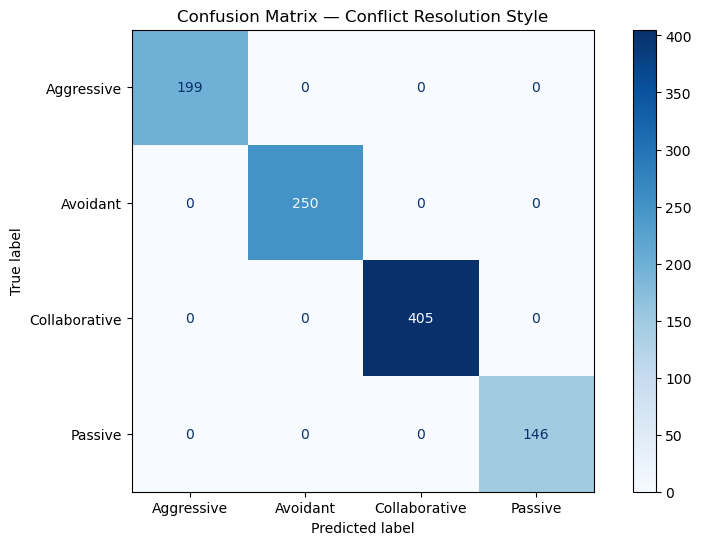

Accuracy: 1.0

Classification Report:
                precision    recall  f1-score   support

   Aggressive       1.00      1.00      1.00       199
     Avoidant       1.00      1.00      1.00       250
Collaborative       1.00      1.00      1.00       405
      Passive       1.00      1.00      1.00       146

     accuracy                           1.00      1000
    macro avg       1.00      1.00      1.00      1000
 weighted avg       1.00      1.00      1.00      1000



In [ ]:
labels = le.classes_

cm = confusion_matrix(y_test_str, y_pred_str, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

fig, ax = plt.subplots(figsize=(10, 6))
disp.plot(ax=ax, cmap="Blues")
plt.title("Confusion Matrix — Conflict Resolution Style")
plt.show()

# Classification report
print("Accuracy:", accuracy_score(y_test_str, y_pred_str))

print("\nClassification Report:\n",
      classification_report(y_test_str, y_pred_str, target_names=labels))

**Marriage Type**

In [ ]:
target = 'marriage_type'
X = df.drop(columns=[target])
y = df[target]

In [ ]:
le = LabelEncoder()
y_encoded = le.fit_transform(y)

print("Encoder classes:", le.classes_)

Encoder classes: ['Arranged' 'Love' 'Other']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

In [ ]:
X_train = pd.get_dummies(X_train, drop_first=True)
X_test  = pd.get_dummies(X_test, drop_first=True)

# Align feature columns
X_train, X_test = X_train.align(X_test, join="left", axis=1, fill_value=0)

In [ ]:
rfc = RandomForestClassifier(
    n_estimators=300,
    class_weight="balanced",
    random_state=42
)
rfc.fit(X_test, y_test)

,n_estimators,300
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [ ]:
pred = rfc.predict(X_test)

In [ ]:
y_test_str = le.inverse_transform(y_test)
y_pred_str = le.inverse_transform(pred)

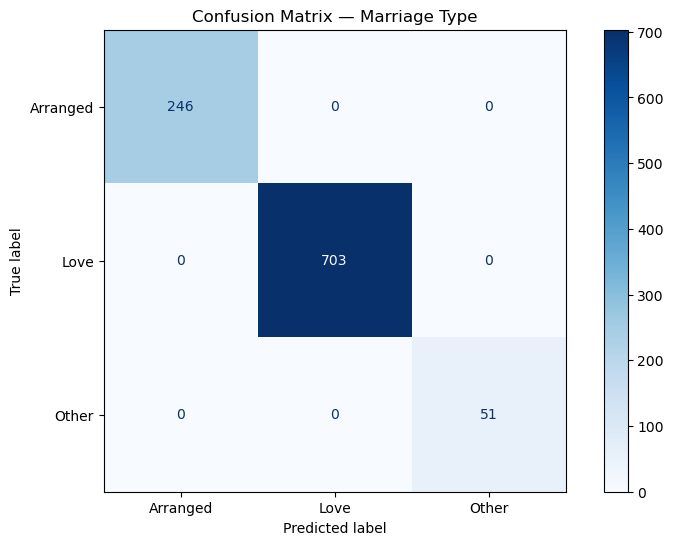

Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

    Arranged       1.00      1.00      1.00       246
        Love       1.00      1.00      1.00       703
       Other       1.00      1.00      1.00        51

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



In [ ]:
labels = le.classes_

cm = confusion_matrix(y_test_str, y_pred_str, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

fig, ax = plt.subplots(figsize=(10, 6))
disp.plot(ax=ax, cmap="Blues")
plt.title("Confusion Matrix — Marriage Type")
plt.show()

# Classification report
print("Accuracy:", accuracy_score(y_test_str, y_pred_str))

print("\nClassification Report:\n",
      classification_report(y_test_str, y_pred_str, target_names=labels))

**Counseling**

In [ ]:
target = 'counseling_attended'
X = df.drop(columns=[target])
y = df[target]

In [ ]:
le = LabelEncoder()
y_encoded = le.fit_transform(y)

print("Encoder classes:", le.classes_)

Encoder classes: [0 1]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

In [ ]:
X_train = pd.get_dummies(X_train, drop_first=True)
X_test  = pd.get_dummies(X_test, drop_first=True)

# Align feature columns
X_train, X_test = X_train.align(X_test, join="left", axis=1, fill_value=0)

In [ ]:
rfc = RandomForestClassifier(
    n_estimators=300,
    class_weight="balanced",
    random_state=42
)
rfc.fit(X_test, y_test)

,n_estimators,300
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [ ]:
pred = rfc.predict(X_test)

In [ ]:
y_test_str = le.inverse_transform(y_test)
y_pred_str = le.inverse_transform(pred)

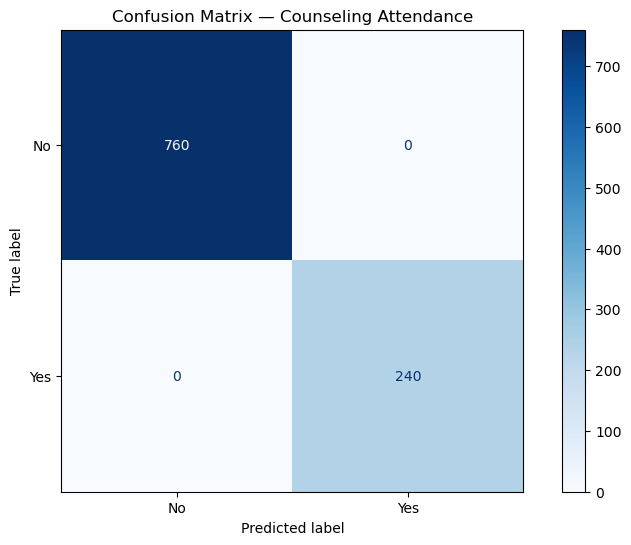

Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

          No       1.00      1.00      1.00       760
         Yes       1.00      1.00      1.00       240

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



In [ ]:
# --- MANUAL MAPPING ---
mapping = {0: "No", 1: "Yes"}

# Convert numeric test & predictions to strings
y_test_str = [mapping[val] for val in y_test]
y_pred_str = [mapping[val] for val in pred]

# Label names for confusion matrix and classification report
labels = ["No", "Yes"]

# Confusion matrix
cm = confusion_matrix(y_test_str, y_pred_str, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

fig, ax = plt.subplots(figsize=(10, 6))
disp.plot(ax=ax, cmap="Blues")
plt.title("Confusion Matrix — Counseling Attendance")
plt.show()

# Classification report
print("Accuracy:", accuracy_score(y_test_str, y_pred_str))

print("\nClassification Report:\n",
      classification_report(y_test_str, y_pred_str, target_names=labels))


**Machine Learning algorithm using Decision Tree**

In [ ]:
X = df.drop(['marriage_duration_years',  'num_children', 'education_level',      'employment_status',    'combined_income',      'religious_compatibility',      'cultural_background_match',    'communication_score',  'conflict_frequency',    'mental_health_issues', 'infidelity_occurred',  'counseling_attended',  'social_support',       'shared_hobbies_count', 'marriage_type',        'pre_marital_cohabitation',     'domestic_violence_history'], axis=1)
Y = df['divorced']

In [ ]:
# Train-test split
X_train, X_test, Y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [ ]:
# One-hot encode the 'conflict_resolution_style' column
X_train_encoded = pd.get_dummies(X_train, columns=['conflict_resolution_style'], drop_first=True)
X_test_encoded = pd.get_dummies(X_test, columns=['conflict_resolution_style'], drop_first=True)


In [ ]:
# Create and train Decision Tree model
dt = DecisionTreeClassifier(
    criterion="entropy",      # Information gain
    max_depth=4,              # Limit depth for interpretability
    random_state=42
)
dt.fit(X_train_encoded, Y_train)

,criterion,'entropy'
,splitter,'best'
,max_depth,4
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [ ]:
# Predict on test set
y_pred = dt.predict(X_test_encoded)


In [ ]:
# Evaluate performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 1.0

Confusion Matrix:
 [[593   0]
 [  0 407]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       593
           1       1.00      1.00      1.00       407

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



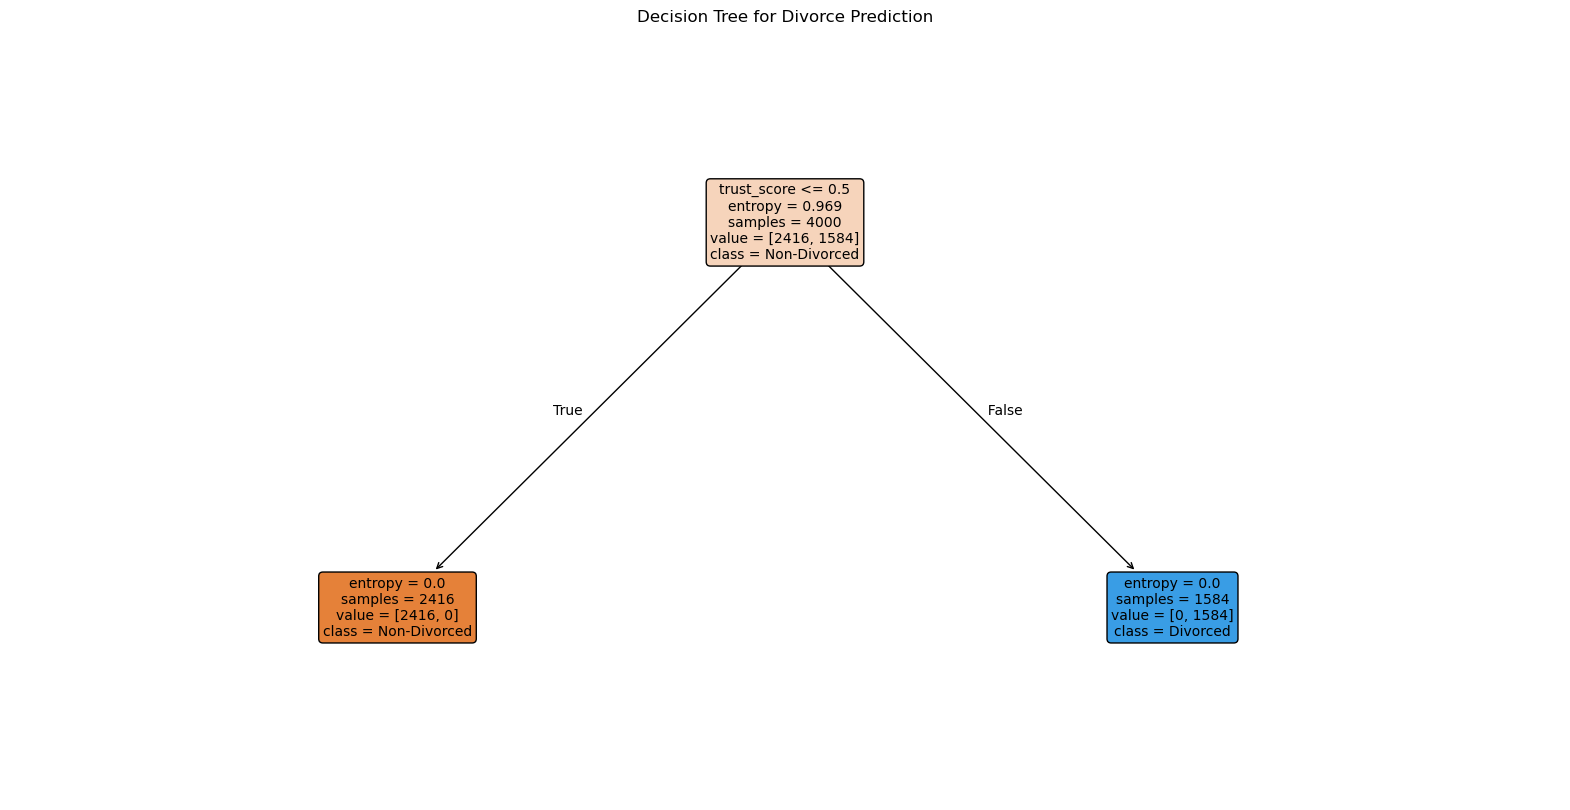

In [ ]:
# Plot the tree
plt.figure(figsize=(20, 10))
plot_tree(
    dt,
    feature_names=X.columns,
    class_names=["Non-Divorced", "Divorced"],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Decision Tree for Divorce Prediction")
plt.show()